# <font color='blue'>Complejidad de modelos y métodos de validación </font>

## Diferencia entre función de costo y métrica de evaluación

Como vimos en las primeras sesiones de clase, a la hora de definir una tarea de ML es necesario establecer la plantilla de modelo que se va a usar, junto con el criterio de entrenmiento o función de costo y el algoritmo de entrenamiento. La función de costo es una medida que nos permite realizar la optimización del modelo y que debe cumplir ciertas restricciones, como el hecho de ser continua, pero su valor no necesariamente tiene una interpretación directa de cara al problema que se está resolviendo. Por esa razón es necesario utilizar médidas de evaluación, que permitan establecer el desempeño del modelo de ML.

## <font color='blue'>Medidas de desempeño para problemas de Regresión</font>

- Mean Square Error (MSE) $$ E = \frac{1}{L} \sum_{l=0}^{L-1} \left(y^{(l)} - f({\bf{x}}^{(l)}) \right)^2 $$


- Mean Absolute Error (MAE) $$ E = \frac{1}{L} \sum_{l=0}^{L-1} \left|y^{(l)} - f({\bf{x}}^{(l)}) \right| $$


- Median Absolute Error (MedAE) $$ E = \text{median}\left( |y^{(0)} - f({\bf{x}}^{(0)})|, \cdots, |y^{(L-1)} - f({\bf{x}}^{(L-1)})| \right) $$



- Mean Absolute Percentage Error (MAPE) $$ E = \frac{1}{L} \sum_{l=0}^{L-1} \frac{\left|y^{(l)} - f({\bf{x}}^{(l)}) \right|}{y^{(l)}} $$


- Coefficient of determination ($R^2$) $$ R^2 = 1 - \frac{\sum_{l=0}^{L-1} \left(y^{(l)} - f({\bf{x}}^{(l)}) \right)^2}{\sum_{l=0}^{L-1} \left(y^{(l)} - \bar{y}) \right)^2}$$
 donde $\bar{y}$ es el promedio de los $y^{(l)}$

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

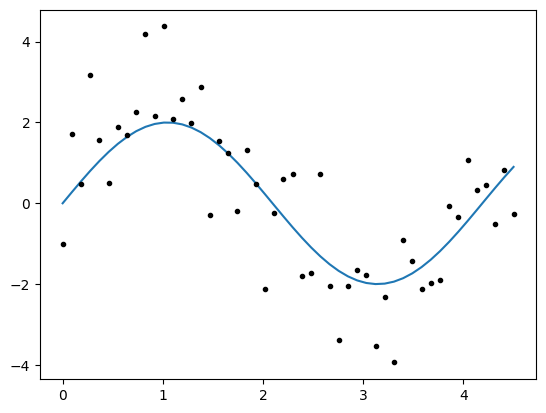

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

size = 50

def f(size):
  f_x = np.linspace(0, 4.5, size)
  f_y = 2 * np.sin(f_x * 1.5)
  return (f_x,f_y)

def sample(size):
  x = np.linspace(0, 4.5, size)
  y = 2 * np.sin(x * 1.5) + np.random.randn(x.size)
  return (x,y)


f_x,f_y = f(size)   #función real
plt.plot(f_x, f_y)
x, y = sample(50)   #genrenamos datos ruidosos para ajustar la funcion real
plt.plot(x, y, 'k.')


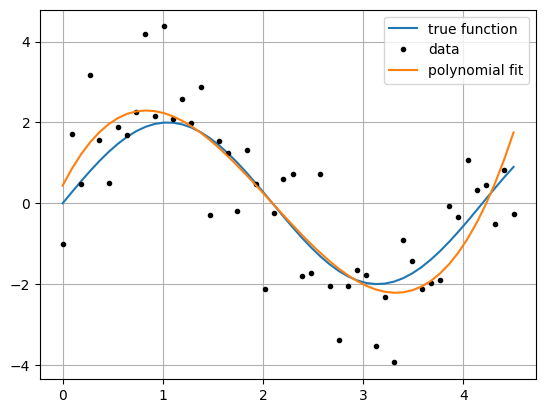

In [ ]:
# Entrenamos modelo de regresión
polynomial_features= PolynomialFeatures(degree=3) # expansión polinómica de las x
x = x.reshape(-1,1) # OJO CUANDO EL ARRAY NO ESTA CLARO SI ES VECTOR FILA O COLUMNA
Xp = polynomial_features.fit_transform(x)
model = LinearRegression()
model.fit(Xp,y)
p_y = model.predict(Xp)

plt.plot(f_x, f_y, label="true function")
plt.plot(x, y, 'k.', label="data")
plt.plot(x, p_y, label="polynomial fit")
plt.legend();
plt.grid();

In [ ]:
print('MSE = '+str(mean_squared_error(y,p_y)))
print('MAE = '+str(mean_absolute_error(y,p_y)))
print('MedAE = '+str(median_absolute_error(y,p_y)))
print('MAPE = '+str(mean_absolute_percentage_error(y,p_y)))
print('R^2 = '+str(r2_score(y,p_y)))

MSE = 1.205983987730275
MAE = 0.8593161120040296
MedAE = 0.7286784467594725
MAPE = 146.98129016886278
R^2 = 0.677921115664729


## <font color='blue'>Compromiso Sesgo - Varianza </font>

**Bias (sesgo)**: es la diferencia entre la predicción promedio de nuestro modelo y el valor correcto que se pretende predecir. Un modelo con alto bias no captura las relaciones relevantes entre las características de entrada y las variables objetivo de salida, pone poca atención a los datos de entrenamiento y sobre-simplifica el modelo.

**Variance**: es un error debido a una alta sensibilidad a pequeñas fluctuaciones en el conjunto de entrenamiento. Una varianza alta puede causar que el modelo se centre en el ruido contenido en los datos más que en la salida deseada. Los modelos que cometen error por varianza suelten tener buenas desempeños en entrenamiento pero altas tasasa de error en conjuntos de prueba.

Formalmente:

El sistema que queremos modelar está dado por:

$$y=f({\bf{x}}) + e$$

donde $e$ es el término de error el cual se asume distribuido normalmente con media 0.

$$Err({\bf{x}}) = E\left[ \left(y - \hat{f}({\bf{x}})\right)^2 \right]$$

Usando propiedades del valor esperado:

$$Err({\bf{x}}) = \left( E[\hat{f}({\bf{x}})] - f({\bf{x}})\right)^2 + E\left[\left(\hat{f}({\bf{x}}) - E\left[\hat{f}({\bf{x}})\right]\right)^2\right] + \sigma_e^2$$

$$Err({\bf{x}}) = \text{Bias}^2 + \text{Variance} + \text{Irreductible Error}$$

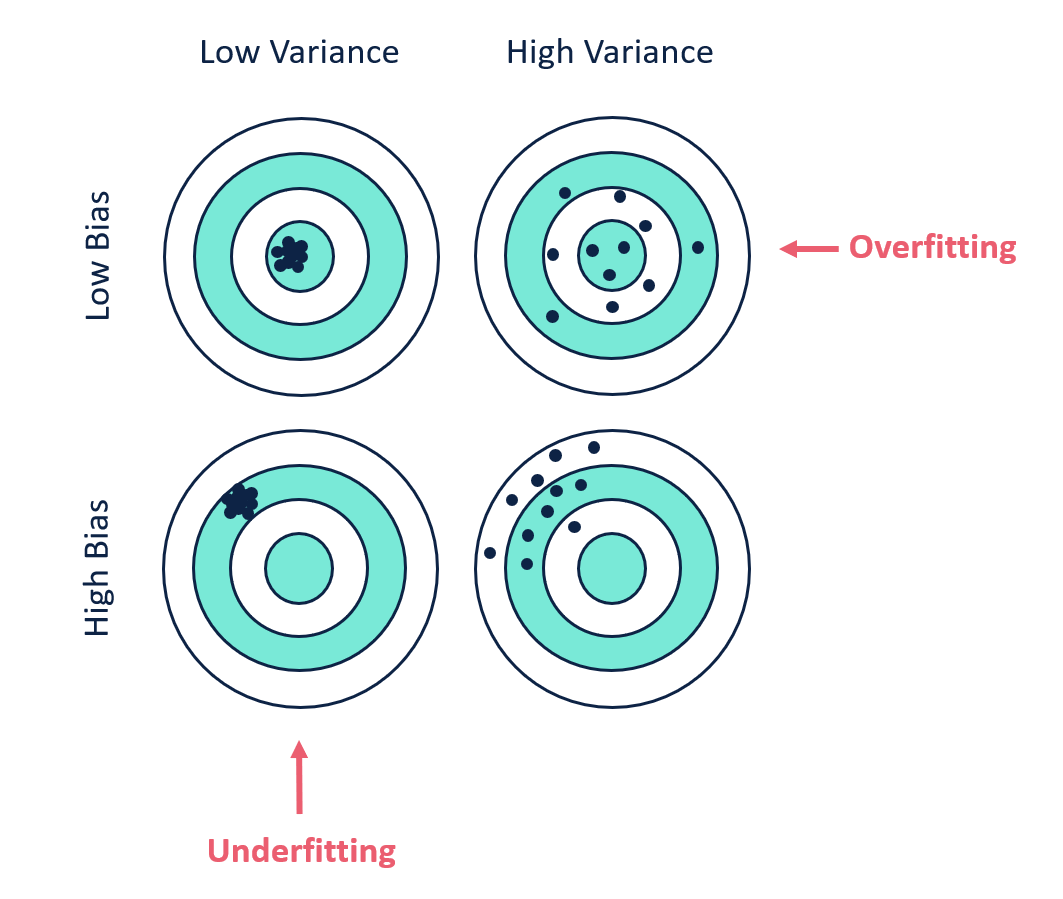

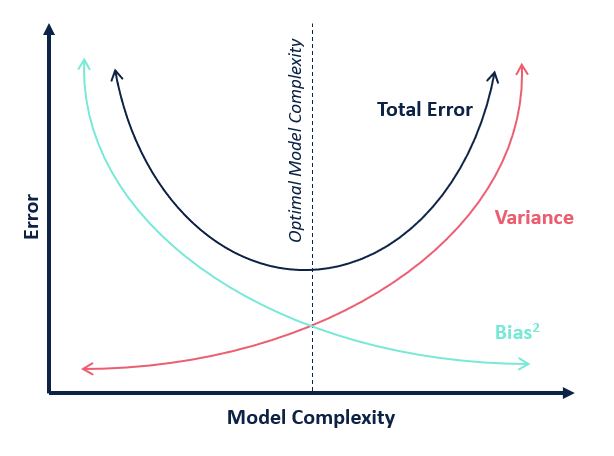

### Veamos un ejemplo:

In [ ]:
class PolynomialLinearRegression:
    def __init__(self, degree):
        self.degree = degree
        self.model = LinearRegression()

    def fit(self, X,y):
        self.model.fit(np.vander(X, self.degree + 1), y)

    def predict(self, X):
        return self.model.predict(np.vander(X, self.degree + 1))

    def score(self, X, y):
        # rmse
        return np.sqrt(np.mean((y-self.predict(X))**2))

In [ ]:
def f(size):
    '''
    Returns a sample with 'size' instances without noise.
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5)
    return (x,y)

def sample(size):
    '''
    Returns a sample with 'size' instances.
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5) + np.random.randn(x.size)
    return (x,y)

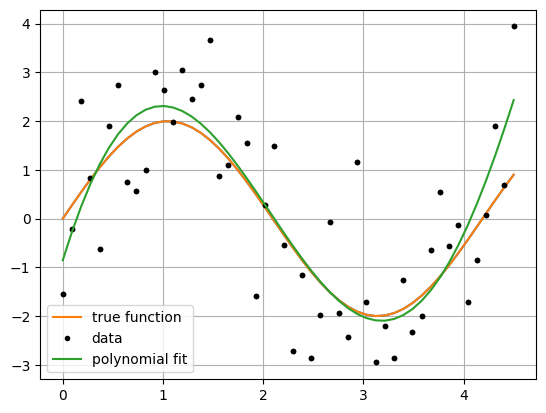

In [ ]:
size = 50
f_x,f_y = f(size)
plt.plot(f_x, f_y)
x, y = sample(50)
plt.plot(x, y, 'k.')
model = PolynomialLinearRegression(degree=5)
model.fit(x,y)
p_y = model.predict(x)
plt.plot(f_x, f_y, label="true function")
plt.plot(x, y, 'k.', label="data")
plt.plot(x, p_y, label="polynomial fit")
plt.legend();
plt.grid();

/tmp/ipython-input-2627422889.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, f(len(x))[1], 'b--', color="red", lw="3", alpha=.5, label="actual function")
/tmp/ipython-input-2627422889.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, f(len(x))[1], 'b--', color="red", lw="3", alpha=.5, label="actual function")
/tmp/ipython-input-2627422889.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, f(len(x))[1], 'b--', color="red", lw="3", alpha=.5, label="actual function")
/tmp/ipython-input-2627422889.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> co

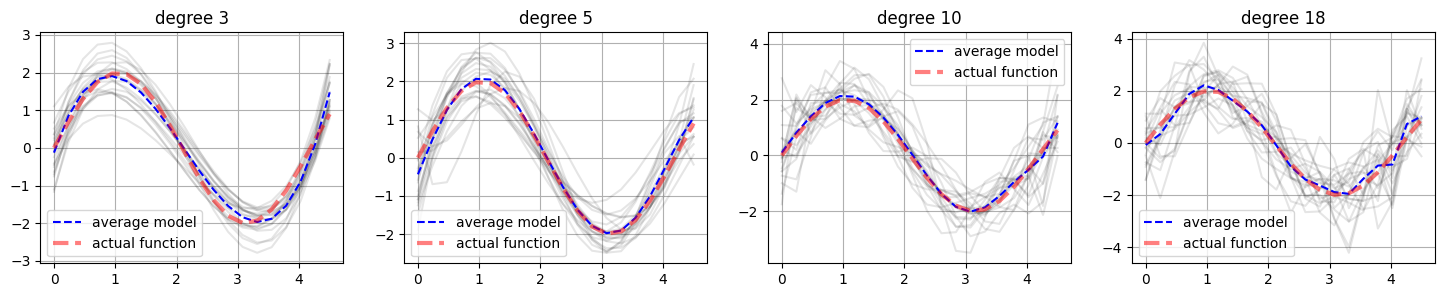

In [ ]:
plt.figure(figsize=(18,3))
for k, degree in enumerate([3, 5, 10, 18]):
    plt.subplot(1,4,k+1)
    n_samples = 20
    n_models = 20
    avg_y = np.zeros(n_samples)
    for i in range(n_models):
        (x,y) = sample(n_samples)
        model = PolynomialLinearRegression(degree=degree)
        model.fit(x,y)
        p_y = model.predict(x)
        avg_y = avg_y + p_y
        plt.plot(x, p_y, 'k-', alpha=.1)
    avg_y = avg_y / n_models
    plt.plot(x, avg_y, 'b--', label="average model")
    plt.plot(x, f(len(x))[1], 'b--', color="red", lw="3", alpha=.5, label="actual function")
    plt.legend();
    plt.grid();
    plt.title("degree %d"%degree)

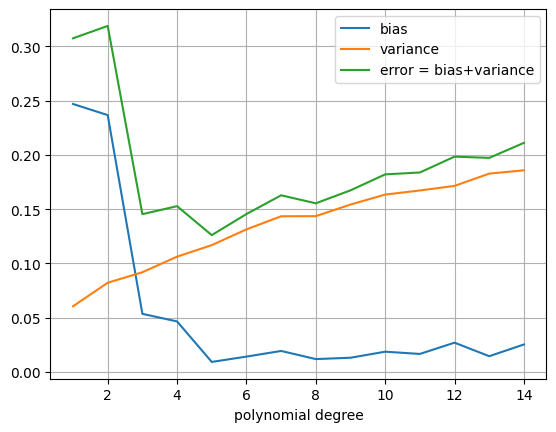

In [ ]:
from numpy.linalg import norm
n_samples = 20
f_x, f_y = f(n_samples)
n_models = 100
max_degree = 15
var_vals =[]
bias_vals = []
error_vals = []
for degree in range(1, max_degree):
    avg_y = np.zeros(n_samples)
    models = []
    for i in range(n_models):
        (x,y) = sample(n_samples)
        model = PolynomialLinearRegression(degree=degree)
        model.fit(x,y)
        p_y = model.predict(x)
        avg_y = avg_y + p_y
        models.append(p_y)
    avg_y = avg_y / n_models
    bias_2 = norm(avg_y - f_y)/f_y.size
    bias_vals.append(bias_2)
    variance = 0
    for p_y in models:
        variance += norm(avg_y - p_y)
    variance /= f_y.size * n_models
    var_vals.append(variance)
    error_vals.append(variance + bias_2)
plt.plot(range(1, max_degree), bias_vals, label='bias')
plt.plot(range(1, max_degree), var_vals, label='variance')
plt.plot(range(1, max_degree), error_vals, label='error = bias+variance')
plt.legend()
plt.xlabel("polynomial degree")
plt.grid();

## <font color='blue'> Metodologías de validación</font>

Cuando vamos a resolver un problema de Machine Learning, tenemos un solo conjunto de datos $\mathcal{D} = \{({\bf{x}}^{(l)},y^{(l)})\}_{l=1}^L$. Las metodologías de validación nos permiten usar ese conjunto de manera apropiada para realizar la selección de los parámetros del modelo y estimar medidas de desempeño confiables.


Existen varias maneras de muestrear los datos, las dos metodologías más utilizadas son validación cruzada y Bootstrapping.

### Validación cruzada ($k$-fold cross-validation)

En primer lugar se divide el conjunto de datos de manera aleatoria en dos subconjuntos: Training y Test, típicamente 80% - 20% respectivamente. El conjunto de entrenamiento a su vez se divide nuevamente de manera aleatoria en $k$ subconjuntos disyuntos, se usan $k-1$ suubconjuntos para entrenar y el conjunto restante para validar; dicho proceso se repite $k$ veces. El proceso de entrenamiento y validación se utliza para seleccionar los hiperparámetros del modelo y el conjuto de test para evaluar el desempeño una vez escogido el mejor subconjunto de parámetros.

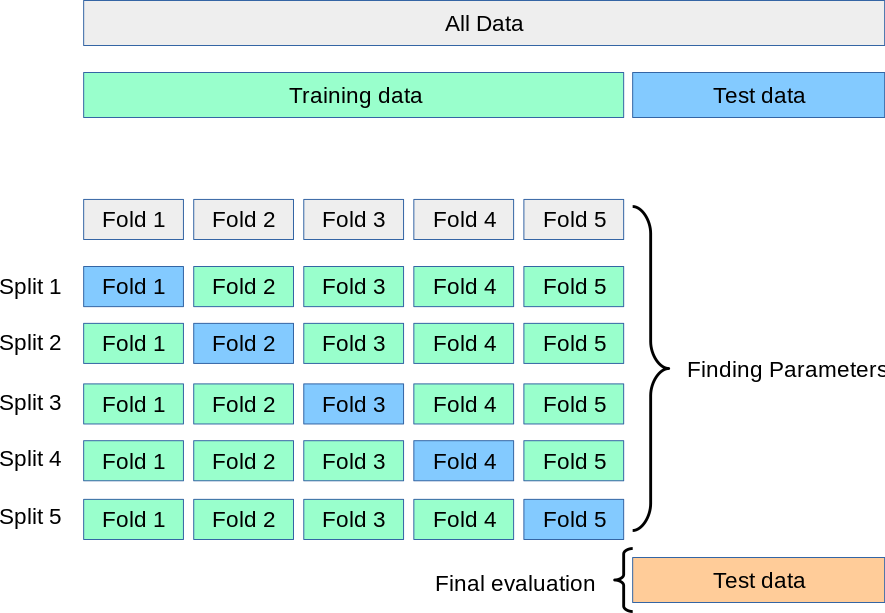

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1234)
x = np.random.randn(30)
y = -0.5*x**4 + 2*x**3 -3 + np.random.randn(len(x))



30 24 6


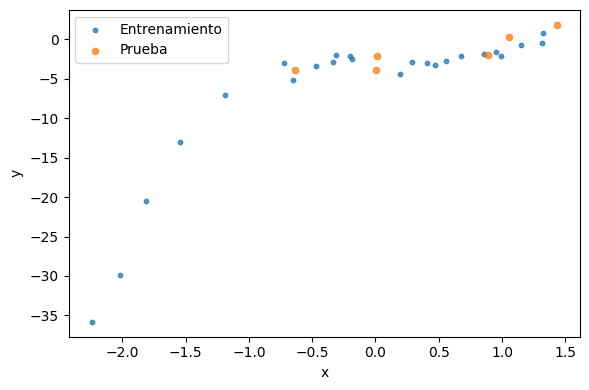

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(len(y), len(y_train), len(y_test))

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.scatter(X_train, y_train, s=10, label='Entrenamiento', alpha=0.75)
ax.scatter(X_test, y_test, s=20, label='Prueba', alpha=0.75)
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y');

In [3]:
from sklearn.metrics import make_scorer, mean_squared_error

scorer = make_scorer(mean_squared_error)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

val_scores = []
train_scores = []
degrees = np.arange(1, 11, step=1)

for degree in degrees:
    # Modelo con validación
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression(fit_intercept=False))
    val_scores.append(cross_val_score(model, X_train.reshape(-1, 1), y_train, cv=5, scoring=scorer))
    # Modelo sin validación
    model.fit(X_train.reshape(-1, 1), y_train)
    train_scores.append(scorer(model, X_train.reshape(-1, 1), y_train))

score_mean = [score.mean() for score in val_scores]
degrees[np.argmin(score_mean)]

np.int64(3)

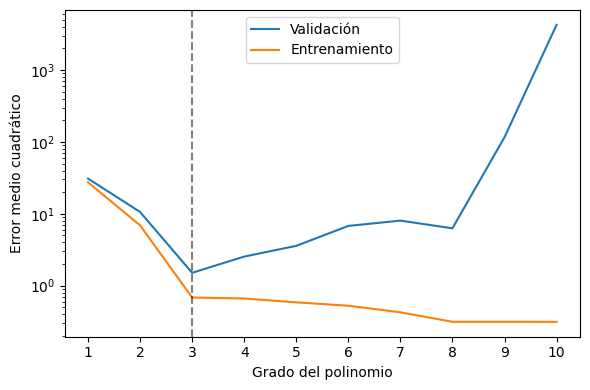

In [5]:
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(np.arange(1, len(score_mean)+1), score_mean, label='Validación')
ax.plot(np.arange(1, len(train_scores)+1), train_scores, label='Entrenamiento')
ax.axvline(3, ls='--', c='k', alpha=0.5)
ax.set_yscale('log')
ax.set_xticks(range(1, 11))
plt.legend()
ax.set_xlabel('Grado del polinomio')
ax.set_ylabel('Error medio cuadrático');

In [27]:
from sklearn.metrics import r2_score
model = make_pipeline(PolynomialFeatures(3), LinearRegression(fit_intercept=False))
model.fit(X_train.reshape(-1, 1), y_train)
y_hat = model.predict(X_test.reshape(-1, 1))
r2_score(y_test, y_hat)

0.7882447025513325

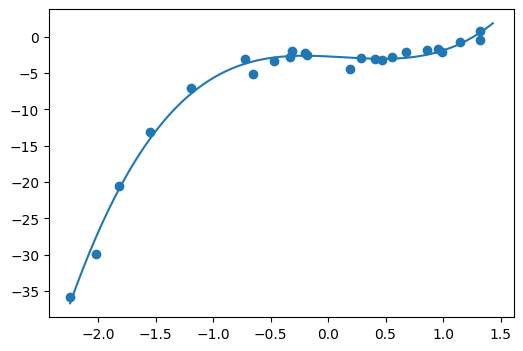

In [28]:
x_range = np.linspace(x.min(), x.max(), 200)
y_range = model.predict(x_range.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(X_train, y_train)
ax.plot(x_range, y_range);

##GridSearch CV

In [33]:
from sklearn.model_selection import GridSearchCV

params = {'polynomialfeatures__degree': np.arange(1, 11)}

model = make_pipeline(PolynomialFeatures(), LinearRegression(fit_intercept=False))

validator = GridSearchCV(model, params, cv=5, scoring=scorer, verbose=True)

validator.fit(X_train.reshape(-1, 1), y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [34]:
validator.best_params_, validator.best_score_

({'polynomialfeatures__degree': np.int64(3)}, np.float64(-1.5070219734256594))

In [35]:
x_range = np.linspace(x.min(), x.max(), 200)
y_range = validator.predict(x_range.reshape(-1, 1))

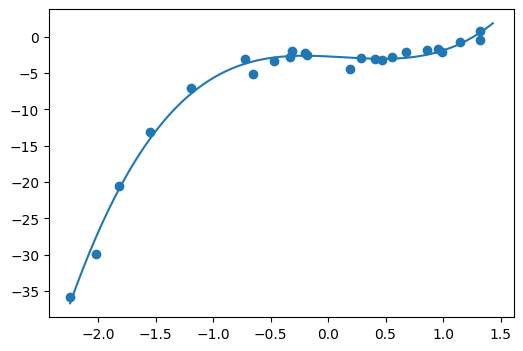

In [36]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(X_train, y_train)
ax.plot(x_range, y_range);

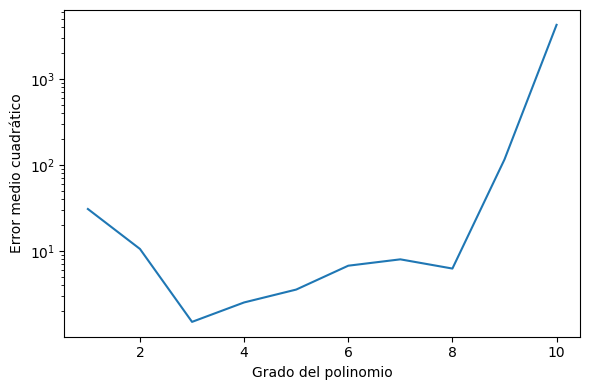

In [37]:
hparam_value = validator.cv_results_['param_polynomialfeatures__degree'].data
valid_mean = -1*validator.cv_results_['mean_test_score']

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(hparam_value, valid_mean)
ax.set_yscale('log')
ax.set_xlabel('Grado del polinomio')
ax.set_ylabel('Error medio cuadrático');

In [38]:
from sklearn.metrics import r2_score
model = make_pipeline(PolynomialFeatures(3), LinearRegression(fit_intercept=False))
model.fit(X_train.reshape(-1, 1), y_train)
y_hat = model.predict(X_test.reshape(-1, 1))
r2_score(y_test, y_hat)

0.7882447025513325

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
%matplotlib inline
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


(150, 2)


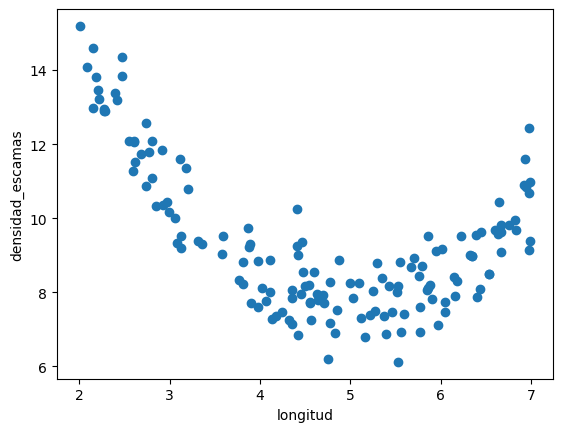

In [41]:
d = pd.read_csv("/content/gdrive/MyDrive/DOCENCIA/PreGrado/MachineLearning/ML-UCSP/CONTENIDO 2025/Dataset/trilotropicos.csv")
print (d.shape)
plt.scatter(d.longitud, d.densidad_escamas)
plt.xlabel(d.columns[0])
plt.ylabel(d.columns[1]);

In [42]:
x = d.longitud
y = d.densidad_escamas

150 120 30


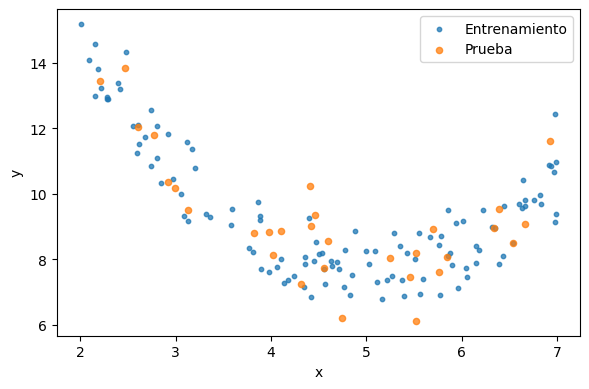

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(len(y), len(y_train), len(y_test))

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.scatter(X_train, y_train, s=10, label='Entrenamiento', alpha=0.75)
ax.scatter(X_test, y_test, s=20, label='Prueba', alpha=0.75)
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y');

In [52]:
from sklearn.model_selection import GridSearchCV

params = {'polynomialfeatures__degree': np.arange(1, 11)}

model = make_pipeline(PolynomialFeatures(), LinearRegression(fit_intercept=False))

validator = GridSearchCV(model, params, cv=5, scoring=scorer, verbose=True)

# Convert Series to NumPy arrays before reshaping
validator.fit(X_train.values.reshape(-1, 1), y_train.values);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


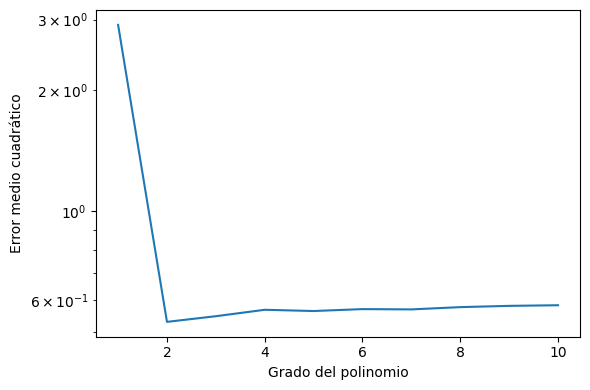

In [53]:
hparam_value = validator.cv_results_['param_polynomialfeatures__degree'].data
valid_mean = -1*validator.cv_results_['mean_test_score']

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(hparam_value, valid_mean)
ax.set_yscale('log')
ax.set_xlabel('Grado del polinomio')
ax.set_ylabel('Error medio cuadrático');

In [54]:
from sklearn.metrics import r2_score
model = make_pipeline(PolynomialFeatures(2), LinearRegression(fit_intercept=False))
model.fit(X_train.values.reshape(-1, 1), y_train)
y_hat = model.predict(X_test.values.reshape(-1, 1))
r2_score(y_test, y_hat)

0.7651938930173036